In [1]:
# Version 3.0
# By Shehab Tarek 320220099
import  matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate

In [2]:
def get_inputs(filepath : str) -> tuple:
    """
    Reads data from csv file
    
    Returns:
        (x,y, degree)(tuple): a tuple that contains x and y and the degree
    """
    try:
        with open(filepath, "r") as file:
            data = file.readlines()
            x,y = [], []
            for line in data:
                x_i, y_i = map(float, line.strip().split(",")) # e.g. [1, 2.5]
                x.append(x_i)
                y.append(y_i)
    except FileNotFoundError:
        raise ValueError("File not found")

    degree = int(input("Enter the polynomial degree"))

    assert len(x) == len(y), "[Error] x and y are not consistent"
    assert degree>0, ("[Error] can't fit a polynomial with degree 0 or less")
    assert degree<len(x), ("[Error] not enough points provided for given degree")
    
    return (x,y, degree)

In [3]:
x, y, degree = get_inputs("data.csv")

In [4]:
def view_data(x : list, y : list) -> None:
    """
    Displays data

    Args:
        x(list): a list of x-values, length m
        y(list): a list of y-values, length m
    Returns:
        None
    Raises:
        Unmatched Length: Raises and Error
    """
    assert len(x) == len(y), "[Error] x and y are not consistent"
    assert degree>0, ("[Error] can't fit a polynomial with degree 0 or less")
    assert degree<len(x), ("[Error] not enough points provided for given degree")

    tb_headers = ["x","y"]
    tb_data = [[x[i],y[i]] for i in range(len(x))] #Table data pairs list
    tb_format = "grid" #Table formatting

    tb = tabulate(tb_data,tb_headers,tb_format)

    print(tb)

In [5]:
view_data(x,y )
print("Polynomial Fit of degree: "+str(degree))

+-----+----------+
|   x |        y |
+=====+==========+
|   1 | 0        |
+-----+----------+
|   3 | 0.549306 |
+-----+----------+
|   4 | 0.693147 |
+-----+----------+
|   7 | 0.972955 |
+-----+----------+
|  14 | 1.31953  |
+-----+----------+
|  20 | 1.49787  |
+-----+----------+
|  21 | 1.52226  |
+-----+----------+
|  30 | 2        |
+-----+----------+
Polynomial Fit of degree: 3


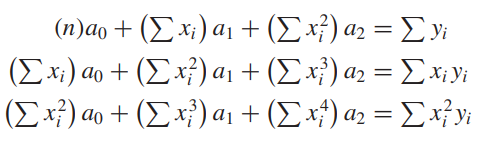
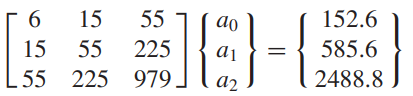


In [6]:
def polynomial_regression(x: list, y:list, m:int) -> tuple:
    """
    my notes:
        deduction 1:
            i deduced a general form from the book's 3x3 matrix example:

            matrix[]                                                              a[]       sum_of_xy[]

            [n              sum(xi   )       sum(xi**2)   ..    sum(xi**(m))   ]  [a0]   [sum(yi)         ]
            [sum(xi   )     sum(xi**2)       sum(xi**3)   ..    sum(xi**(m+1)) ]  [a1]   [sum(yi * xi)    ]
            [sum(xi**2)     sum(xi**3)       sum(xi**4)   ..    sum(xi**(m+2)) ]  [a2] = [sum(yi * xi**2) ]
            [sum(xi**3)     sum(xi**4)       sum(xi**5)   ..    sum(xi**(m+3)) ]  [a3]   [sum(yi * xi**3) ]
            [   ...             ...          ...          ..        ..         ]  [..]   [       ...      ]
            [sum(xi**m)     sum(xi**(m+1)) sum(xi**(m+2)) ..    sum(xi**(2m))  ]  [am]   [ sum(yi * xi**m)]

            note: we need to prepare the sum from sum(xi**1) to sum(xi**2m) before building the matrix

        deduction 2: 

            degree 1 would be 2x2
            degree 2 would be 3x3
            degree 3 would be 4x4

            so the matrix depends on the polynomial degree and we can define the matrix size as (m+1) x (m+1)

        deduction 3:
            matrix[row][column] = sum(xi**(row+column))

    params:
        m(int): the polynomial fitting degree

    returns:
        a(list): list that has all the coefficients
    

    """

    n = len(x)

    # for optimization we will prepare all the sums needed first before building the matrix

    #[ n, sum(xi),    sum(xi**2), ... ,   sum(xi**(2m))]
    sum_of_x = [n]
    for pow in range(1, m*2+1):
        power_sum = 0
        for i in range(0,n):
            power_sum += x[i] ** pow
        sum_of_x.append(power_sum)

    #[ sum(yi),       sum(yi*xi),  ... ,     sum(yi*(xi**m)),]
    sum_of_xy = []
    for pow in range(m + 1):
        power_sum = 0
        for i in range(n):
            power_sum += x[i] ** pow * y[i]
        sum_of_xy.append(power_sum)

    s = ["⁰", "¹", "²", "³", "⁴", "⁵", "⁶", "⁷", "⁸", "⁹"]
    if len(sum_of_x) < len(s):
        print("\n".join([f"∑xi{s[i]}:"+str(round(sum_of_x[i],2)) for i in range(1,len(sum_of_x))]),end="\n\n")
        print("\n".join([f"∑yi xi{s[i]}:"+str(round(sum_of_xy[i],2)) for i in range(0,len(sum_of_xy))]))

    # [n              sum(xi   )     ..  sum(xi**(m))  ]
    # [sum(xi   )     sum(xi**2)     ..  sum(xi**(m+1))]
    # [   ...             ...        ..      ..        ]
    # [sum(xi**m)     sum(xi**(m+1)) ..  sum(xi**(2m)) ]
    matrix = []
    for row in range(m + 1): # size of matrix: (m+1) x (m+1)
        row_values = []
        for col in range(m + 1):
            row_values.append(sum_of_x[row + col])
        matrix.append(row_values)

    # contains the coefficients: [a0, a1, a2, ..]
    a = np.linalg.solve(matrix,sum_of_xy) # we use numpy to solve the linear equation for us
    return a


In [7]:
a = polynomial_regression(x, y, degree)

print("\n"+"\n".join([f"a{i}: "+str(round(a[i],4)) for i in range(0,len(a))]))

∑xi¹:100.0
∑xi²:2012.0
∑xi³:47440.0
∑xi⁴:1205636.0
∑xi⁵:32140000.0
∑xi⁶:886418132.0

∑yi xi⁰:8.56
∑yi xi¹:151.63
∑yi xi²:3392.8
∑yi xi³:84094.29

a0: -0.1495
a1: 0.2434
a2: -0.0129
a3: 0.0002


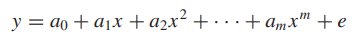

In [8]:
def visualize(x : list, y : list, a:list):
    plt.scatter(x, y, label='DataSet')

    resolution = 100

    min_inp, max_inp = min(x)*.95, max(x)*1.05 # slightly less than minimum and slightly higher than maxmimum
    step = (max_inp-min_inp)/resolution
    x_range = np.arange(min_inp, max_inp, step) # generating range values e.g. [0,.01,.02,.03, ..] so we can visualize the polynomial fitting

    approx_y = []
    # calculating the least squared equation for each xi in x_range
    for xi in x_range:
        # [ a0*xi**0 + a1*xi**1 + a2*xi**2 + ... ]
        approx_y.append(sum(a[i] * (xi**i) for i in range(len(a))))
        # approx_y.append(1/1+sum(2.718281828**(a[i] * (xi**i)) for i in range(len(a))))

    total_error = 0
    for i in range(len(x)):
        y_fit = sum(a[j] * x[i]**j for j in range(len(a)))
        print(f"point {i+1}: "+str(round(y_fit,4)), end="")
        print(f"\t\t\t error: "+str(round(abs(y_fit-y [i]),4)))
        total_error += abs(y_fit-y [i])
    print("Total_Error: ", total_error)

    plt.plot(x_range, approx_y, color='red', label='Fitting Polynomial')

    plt.xlabel('X')
    plt.ylabel('Y')

    plt.legend() # displays labels
    plt.show() # displays data

point 1: 0.0812			 error: 0.0812
point 2: 0.471			 error: 0.0783
point 3: 0.633			 error: 0.0602
point 4: 1.0045			 error: 0.0315
point 5: 1.3877			 error: 0.0681
point 6: 1.4757			 error: 0.0221
point 7: 1.4923			 error: 0.03
point 8: 2.0097			 error: 0.0097
Total_Error:  0.38111195831233613


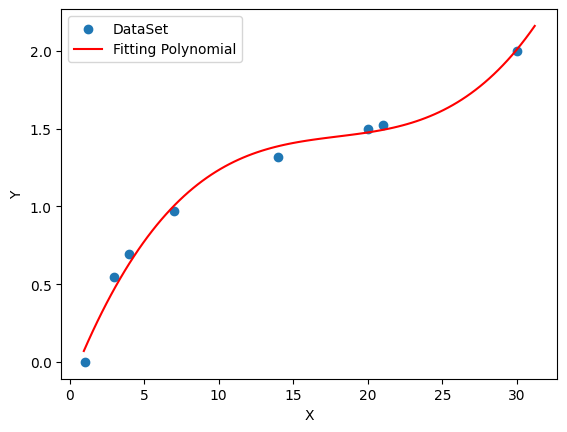

In [9]:
visualize(x, y, a)